# MS 120 Tutorial

## Setup

You may need to import some packages to run the commands below 
(you will certainly need to if you have made a fresh install of Julia).
One of the packages that we will use is Python's SymPy package.
Packages only need to be added once 
and can be added using the code:<br>
`using Pkg`<br>
`Pkg.add("SymPy")`<br>

To import this packages we use the command:<br>
`using SymPy`

but I have loaded all necessary packages as discussed below on the lab computers.
At home you will need to install all of these packages.

If any of the packges listed below have not been installed you will have to install them.
You should be able to copy and paste the code below to install the packages:<br>
`using Pkg`<br>
`Pkg.add("PrettyTables")`<br>
`Pkg.add("SpecialFunctions")`<br>
`Pkg.add("Formatting")`<br>
`Pkg.add("Statistics")`<br>
`Pkg.add("DataFrames")`<br>
`Pkg.add("Plots")`<br>
`Pkg.add("Printf")`<br>
`Pkg.add("SymPy")`<br>
`Pkg.add("PyCall")`<br>

I have only predefined two variables, `x` and `h`.
If you wish to use other variables you will have to run the following command:<br>
`y = Sym("y")`

References:
* Main: used [Symbolic math with julia](http://mth229.github.io/symbolic.html)

## Basics
The file `JSUMS120.jl` must be placed in the folder where you want to save your Notebook in
and you must run the `include("JSUMS120.jl")` command in your Notebook 
before you can use the functions described in this document.
In addition to defining some of the functions we will use,
it also imports the needed packages as discussed above.

The commands we will use, 
where they are defined, 
and a very short description 
can be found in the table below.
Note that the command names are linked to where I have introduced 
and show examples for that command.

|command|where|description|
|:-------|:-----|:-----------|
|<a href='#simplify_cell'>simplify</a>|SymPy|simplifies expressions|
|<a href='#factor_cell'>factor</a>|SymPy|factors expression|
|<a href='#expand_cell'>expand</a>|SymPy|expands expression|
|<a href='#N_cell'>N</a>|SymPy|convert to numerical|
|<a href='#roots_cell'>roots</a>|SymPy|returns the roots and their multiplicity|
|<a href='#solve_cell'>solve</a>|SymPy|solves an equation set =0|
|<a href='#nsolve_cell'>nsolve</a>|SymPy|solve numerically|
|<a href='#diff_cell'>diff</a>|SymPy|takes the derivative||
|<a href='#integrate_cell'>integrate</a>|SymPy|integrates a function, both indefinite and definite|
|<a href='#limittable_cell'>limittable</a>|JSUMS120|make nice table of values when taking a limit|
|<a href='#lim_cell'>lim</a>|JSUMS120|same as SymPy limit except returns `missing` if left and right limits don't agree|
|<a href='#signchart_cell'>signchart</a>|JSUMS120|genrate a sign chart for a function|
|<a href='#functionplot_cell'>functionplot</a>|JSUMS120|plot a given function|
|<a href='#plot_function_sign_chart_cell'>plot_function_sign_chart</a>|JSUMS120|plot a given function and its sign charts|
|<a href='#summary_cell'>summary</a>|JSUMS120|returns information about a function necessary for graphing|
|<a href='#clean_figs_folder_cell'>clean_figs_folder</a>|JSUMS120|needed when you change inputs for summary with the same function|
|<a href='#graph_f_and_derivative_cell'>graph_f_and_derivative</a>|JSUMS120|plots a function and it's derivative|

In [1]:
include("JSUMS120.jl")

graph_f_and_derivative

We can define a Julia function `f(x)`.
The `fex` assignment allows us to "evaluate" the expression at the value as seen below.

In [2]:
f(x) = exp(x^2)
fex = exp(x^2)
f(x)

 / 2\
 \x /
e    

If we evaluate `f(x)` at 2 Julia returns the numerical value.

In [3]:
f(2)

54.598150033144236

The subs function evaluates the function `f(x)` symbolically.

In [4]:
subs(f(x),  x, 2)

 4
e 

Which we can also do using the variable `fex`:

In [5]:
fex(2)

 4
e 

Which can be evaluated numerically using the `N` function:

In [6]:
N(fex(2))

54.598150033144236

***

Help can be found using the `?` command.

***

## Algebra Stuff

`SymPy` can do algebra.
For example it will simplify expressions.

In [7]:
x^2 + 5x +2x^2 -7x -11

   2           
3*x  - 2*x - 11

There are some things that it will not automatically simplify:

In [8]:
x^2-4x+4 - (x-2)^2

 2                2    
x  - 4*x - (x - 2)  + 4

<a id='simplify_cell'></a>
But it can sometimes be coerced to go further using `simplify`:

In [9]:
simplify(x^2-4x+4 - (x-2)^2)

0

<a id='factor_cell'></a>
It can also factor using the (shockingly named) `factor` function:

In [10]:
factor(x^2 + 5x + 6)

(x + 2)*(x + 3)

In [11]:
factor(x^2 - 6x + 9)

       2
(x - 3) 

If we evaluate a factored form:

In [12]:
p = (x + 1)*(x + 2)*(x + 3)

(x + 1)*(x + 2)*(x + 3)

<a id='expand_cell'></a>
It remains factored,
but can be forced to expand using `expand`:

In [13]:
p = expand(p)

 3      2           
x  + 6*x  + 11*x + 6

Note that if we left the Asterisk off in the above expression then it does something weird.
Also if your spelling is as bad as mine you might spell it as Asterix but he is different from the symbol

![](asterix-s.png)

Anyway I don't know what is going on yet with the missing asterisks as can be seen below:

In [14]:
(x + 1)(x + 2)(x + 3)

x + 6

We can factor our expression with `factor`:

In [15]:
factor(p)

(x + 1)*(x + 2)*(x + 3)

<a id='roots_cell'></a>
And find the roots with `roots`:

In [16]:
roots(p)

Dict{Any,Any} with 3 entries:
  -3 => 1
  -1 => 1
  -2 => 1

The reason for using a dictonary is that it also supplies the multiplicity.

In [17]:
roots((x-1)^3*(x-2)*(x-3)^2)

Dict{Any,Any} with 3 entries:
  1 => 3
  3 => 2
  2 => 1

<a id='solve_cell'></a>
Solve stuff here! `solve`.

In [18]:
vals = solve(x^2 - x - 1)

2-element Array{Sym,1}:
 1/2 - sqrt(5)/2
 1/2 + sqrt(5)/2

<a id='N_cell'></a>
To get the numerical values we use the notation `N.()`.
Note the `.` between the `N` and the `()`.
(This is called broadcasting and I don't think we need it anywhere else).

In [19]:
N.(vals)

2-element Array{BigFloat,1}:
 -0.6180339887498948482045868343656381177203091798057628621354486227052604628189011
  1.618033988749894848204586834365638117720309179805762862135448622705260462818892

<a id='nsolve_cell'></a>
We can solve numerically with `nsolve`.
In general it requires three arguments `nsolve(f, var, x0)` where:
* `f` is the expression to be solved.
* `var` is the variable in the expression (it can be omitted it there is only one variable).
* `x0` is the initial guess.
It only returns a single solution.

In [20]:
nsolve(x^2 - x - 1, x, 0)
nsolve(x^2 - x - 1, 0)

-0.618033988749894848204586834365638117720309179805762862135448622705260462818
9

In [21]:
nsolve(x^2 - x - 1, 2)

1.618033988749894848204586834365638117720309179805762862135448622705260462819

***

## Calculus

### Average Rates of Change

**This section is totally experimental**

The average rate of change for the function $f(x)$ from $a$ to $x$ is given by the formula
$$v_{\mbox{avg}} = \frac{f(x)-f(a)}{x-a}=\frac{f(a+h)-f(x)}{h}$$
where $h = x-a$.

In [22]:
v_avg(f, a) = (f(x) - f(a))/(x-a)

v_avg (generic function with 1 method)

In [23]:
f̅(x) = x^2 #f\overbar + TAB

f̅ (generic function with 1 method)

In [24]:
f̅avg = v_avg(f̅(x), 2)

 2    
x  - 4
------
x - 2 

In [25]:
simplify(f̅avg)

x + 2

### Limits
<a id='limittable_cell'></a>
We can use the `limittable` command to make a table for evaluating limits.

So below we have 
$$\lim_{x \to 2}f̅(x).$$

In [26]:
limittable(f̅(x), 2)

Left,Right
x,y
1.00000000,1.00000000
1.50000000,2.25000000
1.90000000,3.61000000
1.99000000,3.96010000
1.99900000,3.99600100
x,y
3.00000000,9.00000000
2.50000000,6.25000000
2.10000000,4.41000000


I set the default number of rows to $5$, 
but this can be changed with the `rows` argument:

In [27]:
limittable(f̅(x), 2, rows=10)

Left,Right
x,y
1.00000000,1.00000000
1.50000000,2.25000000
1.90000000,3.61000000
1.99000000,3.96010000
1.99900000,3.99600100
1.99990000,3.99960001
1.99999000,3.99996000
1.99999900,3.99999600
1.99999990,3.99999960


We can change the format of the numbers using c-style printf codes http://www.cplusplus.com/reference/cstdio/printf/

In [28]:
limittable(f̅(x), 2, rows=10, format="%15.14f")

Left,Right
x,y
1.00000000000000,1.00000000000000
1.50000000000000,2.25000000000000
1.90000000000000,3.61000000000000
1.99000000000000,3.96010000000000
1.99900000000000,3.99600100000000
1.99990000000000,3.99960001000000
1.99999000000000,3.99996000010000
1.99999900000000,3.99999600000100
1.99999990000000,3.99999960000001


We can also take left and right hand limits.
$$\lim_{x \to 2^-}f̅(x).$$

In [29]:
limittable(f̅(x), 2, dir="-")

x,y
1.00000000,1.00000000
1.50000000,2.25000000
1.90000000,3.61000000
1.99000000,3.96010000
1.99900000,3.99600100


$$\lim_{x \to 2^+}f̅(x).$$

We can also take the limit as $x$ approaches $\infty$s.
Note that $\infty$ is denoted by two lower case "oh"s:
$$\lim_{x \to \infty}f̅(x)$$

In [30]:
limittable(f̅(x), oo)

x,y
100.00,10000.00
1000.00,1000000.00
10000.00,100000000.00
100000.00,10000000000.00
1000000.00,1000000000000.00


In [31]:
limittable(f̅(x), 2, dir="+")

x,y
3.00000000,9.00000000
2.50000000,6.25000000
2.10000000,4.41000000
2.01000000,4.04010000
2.00100000,4.00400100


In [32]:
include("JSUMS120.jl")

graph_f_and_derivative

In [33]:
limittable_pt(f̅(x), 2, dir="+")

x,y
3.00000000,9.00000000
2.50000000,6.25000000
2.10000000,4.41000000
2.01000000,4.04010000
2.00100000,4.00400100


or
$$\lim_{x \to -\infty}f̅(x)$$

In [34]:
limittable(f̅(x), -oo)

x,y
-100.00,10000.00
-1000.00,1000000.00
-10000.00,100000000.00
-100000.00,10000000000.00
-1000000.00,1000000000000.00


Understanding limits is very important.
It is used in CS when discussing asymptotic anaylsis of algorithms,
e.g. how fast is an algorithm.

If the limit of the function $f(x)$ 
as $x$ approches the value $a$ 
($x \to a$)
is the value $L$,
then we write
$$\lim_{x \to a} f(x) = L.$$

<a id='lim_cell'></a>
This can be found using the `lim` function.
So let us find 
$$\lim_{x \to 3} x^2.$$

In [35]:
lim(x^2, x, 3)

9

So we can see that
$$\lim_{x \to 3} x^2 = 9.$$

Now recalling that we defined $f(x) = e^{x^2}$
we can find the limit of it as $x$ approaches $1$.

In [36]:
lim(f(x), x, 1)

E

In [37]:
N(lim(f(x), x, 1))

ℯ = 2.7182818284590...

Sometimes we need to know what the limit of a function is at $\infty$.
Infinity is symbolized by `oo` (two lower case o's) in this package.
Since 
$$\lim_{x \to \infty} \frac{1}{x} = 0$$
we see:

In [38]:
lim(1/x, x, oo)

0

And 
$$\lim_{x \to \infty} x^2 = \infty$$

In [39]:
lim(x^2, x, oo)

oo

And 
$$\lim_{x \to -\infty} x^3 = -\infty$$

In [40]:
lim(x^3, x, -oo)

-oo

We can take one sided limits.
This can be necessary for several reasons.
When we try to take the following limit
$$\lim_{x \to 0} \dfrac{1}{x}$$
we get the result `missing` indicating that the limit does not exist.

In [41]:
lim(1/x, x, 0)

missing

Why? See table of limits:

In [42]:
limittable(1/x, 0)

Left,Right
x,y
-1.00000000,-1.00000000
-0.50000000,-2.00000000
-0.10000000,-10.00000000
-0.01000000,-100.00000000
-0.00100000,-1000.00000000
x,y
1.00000000,1.00000000
0.50000000,2.00000000
0.10000000,10.00000000


$$\lim_{x \to 0^-} \dfrac{1}{x} = -\infty \mbox{ and } \lim_{x \to 0^+} \dfrac{1}{x} = \infty$$

In [43]:
limit(1/x, x, 0, dir="+")

oo

In [44]:
limit(1/x, x, 0, dir="-")

-oo

### Derivatives

<a id='diff_cell'></a>
SymPy also knows how to take derivatives symbolically using the `diff` command.

In [45]:
diff(x^2)

2*x

In [46]:
diff(x^2*x^3)

   4
5*x 

In [47]:
diff(exp(x))

 x
e 

In [48]:
diff(ln(x))

1
-
x

**Sum rule:** $D_x (f(x) + g(x)) = D_x f(x) + D_x g(x)$

In [49]:
diff(x^5 + 3x^2)

   4      
5*x  + 6*x

**Difference rule:** $D_x(f(x)-g(x)) = D_x f(x) - D_x g(x)$

In [50]:
diff(x^5 - 3x^2)

   4      
5*x  - 6*x

**Product rule:** $D_x(f(x)g(x)) = f(x)g'(x) + g(x)f'(x)$

In [51]:
diff(x*exp(x))

   x    x
x*e  + e 

**Quotient rule:** $D_x \dfrac{f(x)}{g(x)} = \dfrac{g(x)f'(x) - f(x)g'(x)}{[g(x)]^2}$

In [52]:
d = diff(exp(x)/x)

 x    x
e    e 
-- - --
x     2
     x 

In [53]:
simplify(d)

         x
(x - 1)*e 
----------
     2    
    x     

**Chain rule:** $D_x f(g(x)) = f'(g(x))g'(x)$

In [54]:
diff(f(x))

     / 2\
     \x /
2*x*e    

In [55]:
g(x) = √x #To get a sqrt symbol type the following followed by the TAB key: \sqrt + TAB

g (generic function with 1 method)

In [56]:
diff(g(x))

   1   
-------
    ___
2*\/ x 

In [57]:
g(f(x))

    _______
   /  / 2\ 
  /   \x / 
\/   e     

In [58]:
diff(g(f(x)))

      _______
     /  / 2\ 
    /   \x / 
x*\/   e     

In [59]:
∛x #\cbrt + TAB

3 ___
\/ x 

In [60]:
diff(diff(g(x)))

 -1   
------
   3/2
4*x   

In [61]:
h1(x) = ln(x)

h1 (generic function with 1 method)

In [62]:
h1′(x) = diff(h1(x)) #h\prime + TAB

h1′ (generic function with 1 method)

In [63]:
h1′(x)

1
-
x

In [64]:
h1′′(x) = diff(h1′(x))

h1′′ (generic function with 1 method)

In [65]:
h1′′(x)

-1 
---
  2
 x 

Another way to take a second derivative is to add an argument to the `diff` function,
but you must also specify the variable when you do this:

In [66]:
diff(ln(x), x, 2)

-1 
---
  2
 x 

### A Look at Graphing

Let see how we can use derivatives to help us understand graphs.
Note that the first time you graph in a Julia section it takes a loooong time.
This issue is being worked on
and reducing the time to graph for a session is a major goal 
(from what I have read).
So be patient for that first graph.

<a id='signchart_cell'></a>
First we can make use of the `signchart` command to make a signchart for our function:

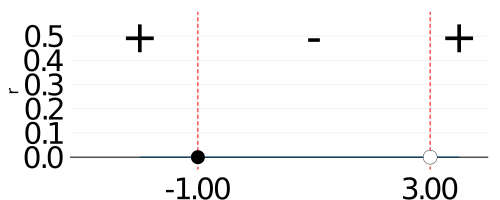

In [67]:
r(x) = (x+1)/(x-3)
#r(x) = x^3

lf = -3
rt = 4
s = signchart(r(x), [lf,rt], "r", tickfontsize=20)

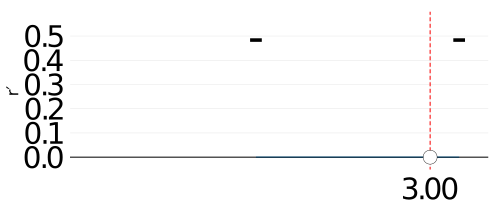

In [68]:
r′(x) = diff(r(x))
s′ = signchart(r′(x), [lf,rt], "r′")

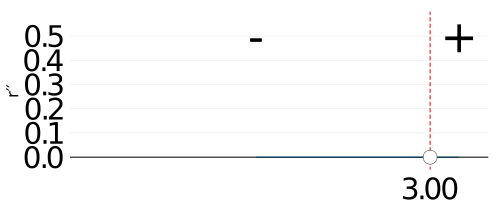

In [69]:
r′′(x) = diff(r′(x))
s′′ = signchart(r′′(x), [lf,rt], "r′′")

<a id='functionplot_cell'></a>
We can also graph our function using the `functionplot` command:

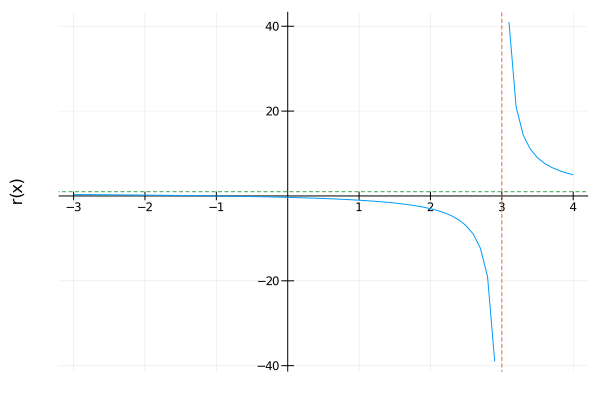

In [70]:
p = functionplot(lf:.1:rt, r(x), lf:rt, "r(x)")

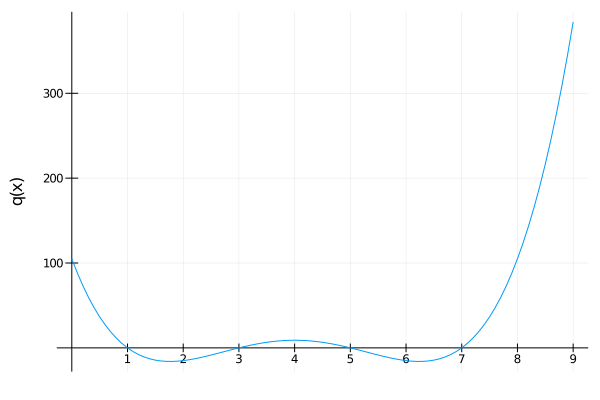

In [71]:
q(x) = (x - 1)*(x - 3)*(x - 5)*(x - 7)
p = functionplot(0:.1:9, q(x), 1:9, "q(x)")

<a id='plot_function_sign_chart_cell'></a>
We can plot the function and its three associated signcharts with the `plot_function_sign_chart` command:

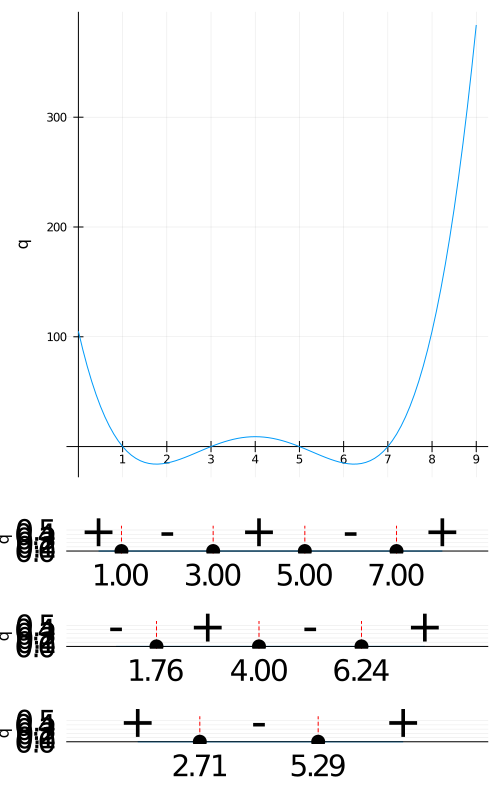

In [72]:
q(x) = (x - 1)*(x - 3)*(x - 5)*(x - 7)
plot_function_sign_chart(q(x), (0,9), 0:9, labels = ["q", "q′", "q′′"])

<a id='summary_cell'></a>
Examples of using the `summary` function:

In [73]:
f(x) = x^2*(x-2)
summary(f(x), [-3,3], "(-∞,∞)", ["f", "f′", "f′′"], 400)

y-intercept: 0.00<br><table>
<tr>
<td><img src="./figs/scx^2(x - 2).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpx^2(x - 2).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scppx^2(x - 2).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: (1.333, -1.185)<br>local maximum = (0.000, 0.000)<br>inflection point: (0.667, -0.593)<br>As x → -∞, f(x) → -∞<br>As x → ∞, f(x) → ∞

In [74]:
summary(q(x), [0,9], "(-∞,∞)", ["q", "q′", "q′′"], 400, marksize=15, tickfontsize=30)

y-intercept: 105.00<br><table>
<tr>
<td><img src="./figs/sc(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: (1.764, -16.000), (6.236, -16.000)<br>local maximum = (4.000, 9.000)<br>inflection point: (2.709, -4.889), (5.291, -4.889)<br>As x → -∞, f(x) → ∞<br>As x → ∞, f(x) → ∞

In [75]:
summary(q(x), [0,9], "[-1,∞)", ["q", "q′", "q′′"], 400, marksize=15)

y-intercept: 105.00<br><table>
<tr>
<td><img src="./figs/sc(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: (1.764, -16.000), (6.236, -16.000)<br>local maximum = (-1.000, 384.000), (4.000, 9.000)<br>inflection point: (2.709, -4.889), (5.291, -4.889)<br>At left endpoint x = -1.0, f(-1.0) = 384.000000000000<br>As x → ∞, f(x) → ∞

In [76]:
summary(q(x), [0,9], "(-∞,9]", ["q", "q′", "q′′"], 400, marksize=15)

y-intercept: 105.00<br><table>
<tr>
<td><img src="./figs/sc(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: (1.764, -16.000), (6.236, -16.000)<br>local maximum = (4.000, 9.000), (9.000, 384.000)<br>inflection point: (2.709, -4.889), (5.291, -4.889)<br>As x → -∞, f(x) → ∞<br>At right endpoint x = 9.0, f(9.0) = 384.000000000000

In [77]:
summary(q(x), [0,9], "[-1,9]", ["q", "q′", "q′′"], 400, marksize=15)

y-intercept: 105.00<br><table>
<tr>
<td><img src="./figs/sc(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x - 7)(x - 5)(x - 3)(x - 1).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: (1.764, -16.000), (6.236, -16.000)<br>local maximum = (-1.000, 384.000), (4.000, 9.000), (9.000, 384.000)<br>inflection point: (2.709, -4.889), (5.291, -4.889)<br>At left endpoint x = -1.0, f(-1.0) = 384.000000000000<br>At right endpoint x = 9.0, f(9.0) = 384.000000000000

In [78]:
summary(r(x), [-3,4], "(-∞,∞)", ["q", "q′", "q′′"], 400, marksize=15, tickfontsize=30)

y-intercept: -0.33<br><table>
<tr>
<td><img src="./figs/sc(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: none<br>local maximum: none<br>inflection point: none<br>As x → -∞, f(x) → 1<br>As x → ∞, f(x) → 1

In [79]:
summary(r(x), [-3,2], "(-∞,∞)", ["q", "q′", "q′′"], 400, marksize=15)

y-intercept: -0.33<br><table>
<tr>
<td><img src="./figs/sc(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: none<br>local maximum: none<br>inflection point: none<br>As x → -∞, f(x) → 1<br>As x → ∞, f(x) → 1

<a id='clean_figs_folder_cell'></a>
When changing input into summary for the same function I haven't yet figured out how to update the figures,
so you will need to delete the old figures with the `clean_figs_folder` command.

In [80]:
#clean_figs_folder("all")
#clean_figs_folder(r)

Now if we rerun the summary command:

In [81]:
summary(r(x), [-3,2], "(-∞,∞)", ["q", "q′", "q′′"], 400, marksize=15)

y-intercept: -0.33<br><table>
<tr>
<td><img src="./figs/sc(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
<td><img src="./figs/scpp(x + 1)_(x - 3).png" alt="drawing" width="400"/></td>
</tr>
</table>
<br>local minimum: none<br>local maximum: none<br>inflection point: none<br>As x → -∞, f(x) → 1<br>As x → ∞, f(x) → 1

<a id='graph_f_and_derivative_cell'></a>
The command `graph_f_and_derivative` graphs a function and it's derivative on the same graph. It can also graph them side-by-side but I need to work on some settings as it currently looks bad!

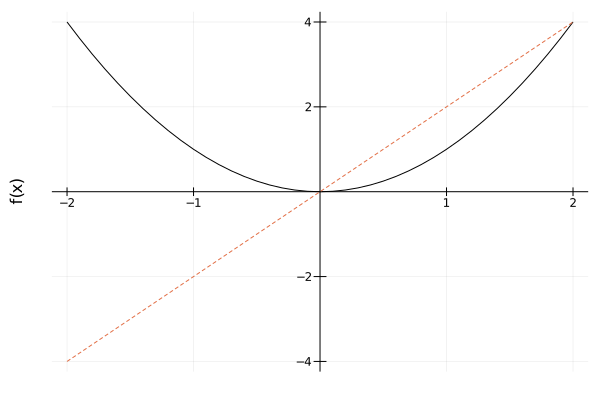

In [82]:
f(x) = x^2
lf=-2
rt=2
graph_f_and_derivative(lf:.1:rt, f(x), lf:rt, "f(x)")

To make `graph_f_and_derivative` plot the function and its derivative side-by-side use the `format` argument and set it to the symbol `:dual`.

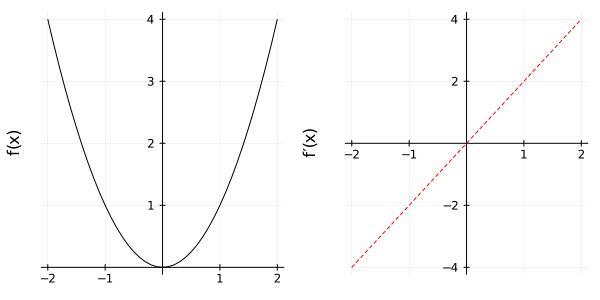

In [83]:
graph_f_and_derivative(lf:.1:rt, f(x), lf:rt, "f(x)", format=:dual)

### Integration

<a id='integrate_cell'></a>
We can integrate functions as well:<br>
$\int f(x) dx = F(x)$
using the `integrate` command.
But note that it does not add the constant of integration:
$$\int x^2 dx = \dfrac{x^3}{3} + C.$$

In [84]:
f(x) = x^2
integrate(f(x), x)

 3
x 
--
3 

Definite integration:<br>
$\int_a^b f(x) dx$

In [85]:
integrate(f(x), (x,0,2))

8/3

Experimental stuff below:

Solve system of equs.

In [86]:
y = Sym("y")
z = Sym("z")
eq1 = Eq(x+y+z,0)
eq2 = Eq(2x-y-z,10)
eq3 = Eq(y+2z,5)
solve([eq1, eq2, eq3], [x,y,z])

Dict{Any,Any} with 3 entries:
  x => 10/3
  y => -35/3
  z => 25/3

Solve ode: Might make new function to make easier to use.

In [89]:
f̂ = sympy.Function("f̂")
y = dsolve(sympy.Derivative(f̂(x),x)-x*cos(x), f̂(x))

f̂(x) = C1 + x*sin(x) + cos(x)

In [96]:
subs(y, x, pi)

f̂(pi) = C1 - 1